In [1]:
pip install google-api-python-client youtube-transcript-api pandas matplotlib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.2 MB/s eta 0:00:00


In [2]:
import re
import csv
import pandas as pd
from googleapiclient.discovery import build
from youtube_transcript_api import YouTubeTranscriptApi

API_KEY = 'your_api_key_here'

def get_video_id(url):
    match = re.search(r'(?:v=|\/)([0-9A-Za-z_-]{11}).*', url)
    return match.group(1) if match else None

def get_video_title(video_id):
    youtube = build('youtube', 'v3', developerKey=API_KEY)
    request = youtube.videos().list(part='snippet', id=video_id)
    response = request.execute()
    return response['items'][0]['snippet']['title'] if response['items'] else 'Unknown Title'

def get_video_transcript(video_id):
    try:
        transcript = YouTubeTranscriptApi.get_transcript(video_id)
        return transcript
    except Exception as e:
        print(f"Error: {e}")
        return []

def save_to_csv(title, transcript, filename):
    data = [{'start': entry['start'], 'text': entry['text']} for entry in transcript]
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    with open(filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Title:', title])

def main():
    url = input("Enter YouTube video link: ")
    video_id = get_video_id(url)
    if not video_id:
        print("Invalid URL")
        return
    title = get_video_title(video_id)
    transcript = get_video_transcript(video_id)
    if not transcript:
        print("Transcript not available")
        return
    filename = f"{video_id}_transcript.csv"
    save_to_csv(title, transcript, filename)
    print(f"Transcript saved to {filename}")

if __name__ == '__main__':
    main()


Enter YouTube video link: https://youtu.be/71op1DQ2gyo?si=tvMFyTqlQiDDjBj2
Transcript saved to 71op1DQ2gyo_transcript.csv


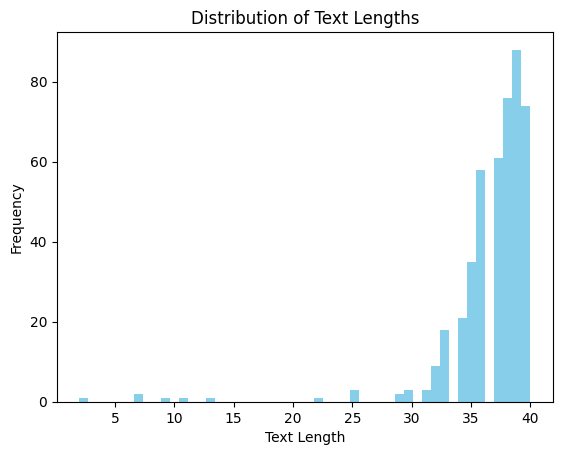

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("71op1DQ2gyo_transcript.csv")

# Remove rows with missing timestamps
df = df[pd.to_numeric(df['start'], errors='coerce').notnull()]
df['start'] = pd.to_numeric(df['start'])

# Add text length column
df['text_length'] = df['text'].apply(len)

# Plot distribution of text length
plt.hist(df['text_length'], bins=50, color='skyblue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['text'])

nmf = NMF(n_components=5, random_state=1).fit(X)
feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(nmf, feature_names, 10)



Topic 1:
muscle growth maximize important target training better reps pure mind

Topic 2:
sets reps week hard tank weight push 10 add leave

Topic 3:
failure way going closer rep really important shy hypertrophy superior

Topic 4:
tension exercises target king causes rope muscles technique point example

Topic 5:
bodybuilding program pure want pre new order ll technique use


In [22]:
from youtube_transcript_api import YouTubeTranscriptApi

# Use video ID
video_id = "V_0Kvr9Mo-8"

# Get the Hindi auto-generated transcript
transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['hi'])

# Display transcript
for entry in transcript:
    print(entry['text'])


यह वो बेसन घाटी है जहां पर 22 अप्रैल को
आतंकियों ने 26 निहत्ते लोगों की हत्या
की।
यहां पर भी खून के निशान अभी भी ताजा हैं।
ये जो धब्बा लगाया गया कश्मीर इसको धुलने
में काफी टाइम।
बोलते भेल पूरी खा रहे पति साइड में था।
एक इंसान आया उसने उसको गोली मार दी। उसने
बोला कि ये शायद मुस्लिम नहीं है। उसने
उसको गोली मार दी।
ये वो जगह है जहां वो लड़की बैठी थी जिसकी
तस्वीर ने पूरे देश को झकझोर दिया। अगर यह
भी पता होता हम लोगों के पहलगाम के खासतौर
पहलगाम के लोकल लोगों के कि ऐसा होगा
हमारे टूरिस्ट पे हमारे मेहमानों पे हम
अपना जान गवाते मगर उनका जान गवाने नहीं
देते शर्मिंदगीगी हमें इस चीज से है कि वी
आर फ्रॉम कश्मीर
अब इस जगह में कोई सुकून महसूस नहीं हो
रहा हम तो जिंदा है मगर इसको कहते हैं
जिंदा मुर्दा क्योंकि हमारा जो अभी खाने
का चावल उबल रहा था अब खाने के लिए तैयार
हो रहा था अब हम खाने आने वाले थे उसमें
जहर डाल दिए।
लोगों की जिंदगी में धूप रोशनी लेकर आती
है। आपकी जिंदगी में धूप अंधेरी ले आए।
बेसरन घाटी की यह हवाएं अब डर का एहसास
कराती हैं। यहां हर तरफ खून के धब्बे हैं।
और यह देख के बशीर बद्र का वो शे

In [1]:
from youtube_transcript_api import YouTubeTranscriptApi

video_id = "V_0Kvr9Mo-8"
transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['hi'])
hindi_text = " ".join([entry['text'] for entry in transcript])


In [11]:
hindi_stopwords = [
    'के', 'का', 'की', 'से', 'है', 'था', 'थे', 'पर', 'को', 'में', 'और', 'ने',
    'यह', 'जो', 'भी', 'तो', 'तक', 'अब', 'या', 'अगर', 'लेकिन', 'कभी', 'बहुत',
    'कर', 'करना', 'किया', 'रहा', 'रहे', 'रही', 'हुआ', 'हुई'
]


In [12]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=hindi_stopwords)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

# Hindi stopwords
hindi_stopwords = [
    'के', 'का', 'की', 'से', 'है', 'था', 'थे', 'पर', 'को', 'में', 'और', 'ने',
    'यह', 'जो', 'भी', 'तो', 'तक', 'अब', 'या', 'अगर', 'लेकिन', 'कभी', 'बहुत',
    'कर', 'करना', 'किया', 'रहा', 'रहे', 'रही', 'हुआ', 'हुई'
]

# Corrected corpus (as string list)
corpus = [
    "अब इस जगह में कोई सुकून महसूस नहीं हो रहा हम तो जिंदा है मगर इसको कहते हैं जिंदा मुर्दा",
    "हमारा जो अभी खाने का चावल उबल रहा था अब खाने के लिए तैयार हो रहा था अब हम खाने आने वाले थे"
]

# Vectorization
vectorizer = CountVectorizer(max_df=0.95, min_df=1, stop_words=hindi_stopwords)
X = vectorizer.fit_transform(corpus)

# Topic Modeling
nmf_model = NMF(n_components=2, random_state=42)
nmf_model.fit(X)

# Display topics
for index, topic in enumerate(nmf_model.components_):
    print(f"Topic {index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])


Topic 1:
['जगह', 'इस', 'नह', 'मगर', 'महस']
Topic 2:
['महस', 'आन', 'उबल', 'अभ', 'वल']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['कभ', 'करन', 'बह', 'रह'] not in stop_words.
  warnings.warn(


In [9]:
doc_topic_matrix = nmf_model.transform(X)

for i, topic_dist in enumerate(doc_topic_matrix):
    dominant_topic = topic_dist.argmax()
    print(f"Document {i+1} is mostly about Topic {dominant_topic + 1}")


Document 1 is mostly about Topic 1
Document 2 is mostly about Topic 2


In [10]:
import pandas as pd

topic_keywords = []

for index, topic in enumerate(nmf_model.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    topic_keywords.append({"Topic": f"Topic {index + 1}", "Keywords": ", ".join(top_words)})

df = pd.DataFrame(topic_keywords)
df.to_csv("hindi_topics.csv", index=False)


In [7]:
from youtube_transcript_api import YouTubeTranscriptApi

video_id = "pykB_fncbkE"

# Request the transcript in Hindi
transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['hi'])

for entry in transcript:
    print(entry['text'])


क्या कश्मीर के पहलगाम में जो कुछ हुआ उसे
लेकर इंडिया वर्सेस पाकिस्तान में वॉर हो
सकती है? अगर भारत और पाकिस्तान में युद्ध
होता है तो कौन
जीतेगा? क्या पाकिस्तान के पास इतना पैसा
है कि वो भारत से लंबा युद्ध लड़ सकता है?
पाकिस्तान जिस एटम बम के दम पर बार-बार
धमकियां देता है। क्या वो भारत को वाकई
में परेशान कर सकती हैं? दुनिया में कौन
किधर खड़ा होगा? यह सवाल बड़ा महत्वपूर्ण
है। क्या वॉर होगी? क्योंकि सोशल मीडिया
पर जुबानी मिसाइलें खूब चल रही हैं।
इंडिया से लेकर पाकिस्तान तक फिलहाल
न्यूज़ रूम जो है वो युद्ध के अखाड़े बन
गए हैं। माहौल बिल्कुल बना है कि इंडिया
पाकिस्तान में वॉर होने वाली है। कभी भी
हो सकती है। दोनों देश के नेता जो है एक
दूसरे के खिलाफ खुलकर बोल रहे हैं। लेकिन
सवाल यह है कि क्या वाकई में कश्मीर को
लेकर यह वॉर हो सकती है? जिस तरह से भारत
ने पहलगाम पर आतंकवादी हमला हुआ उसके बाद
झेलम को लेकर एक बड़ा फैसला किया। ऐसा लग
रहा है कि पाकिस्तान उसे झेल नहीं पा रहा।
पाकिस्तान से बहुत शोर आ रहा है।
पाकिस्तान खुलकर भारत को धमकियां दे रहा
है कि अगर पानी रोका तो यह वॉर की तरह
पहला कदम होगा। 

In [23]:
from youtube_transcript_api import YouTubeTranscriptApi
from googletrans import Translator

#Get Hindi transcript
video_id = "pykB_fncbkE"
transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['hi'])

#Translate to English
translator = Translator()

for entry in transcript[:15]:
    hindi_text = entry['text']
    translated = translator.translate(hindi_text, src='hi', dest='en')
    print(f"Hindi: {hindi_text}")
    print(f"English: {translated.text}")
    print("-" * 50)


Hindi: क्या कश्मीर के पहलगाम में जो कुछ हुआ उसे
English: Has whatever happened in Pahalgam in Kashmir
--------------------------------------------------
Hindi: लेकर इंडिया वर्सेस पाकिस्तान में वॉर हो
English: India Verses should be a war in Pakistan
--------------------------------------------------
Hindi: सकती है? अगर भारत और पाकिस्तान में युद्ध
English: Can?If war in India and Pakistan
--------------------------------------------------
Hindi: होता है तो कौन
English: Who is if it happens
--------------------------------------------------
Hindi: जीतेगा? क्या पाकिस्तान के पास इतना पैसा
English: Will win?Does Pakistan have so much money
--------------------------------------------------
Hindi: है कि वो भारत से लंबा युद्ध लड़ सकता है?
English: Is that he can fight a long war with India?
--------------------------------------------------
Hindi: पाकिस्तान जिस एटम बम के दम पर बार-बार
English: Pakistan on the strength of the atom bomb
--------------------------------------------------
Hindi: 

In [9]:
pip install youtube-transcript-api googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=699a6ae96dddd8b225a60e86a1bef4d694082a3cdf955e1b33246f3bd8cc5bb1
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [2]:
from youtube_transcript_api import YouTubeTranscriptApi
from googletrans import Translator

#Get Hindi transcript
video_id = "pykB_fncbkE"
transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['hi'])

#Translate only first 10 lines
translator = Translator()

for entry in transcript[:10]:
    hindi_text = entry['text']
    translated = translator.translate(hindi_text, src='hi', dest='en')
    print(f"Hindi: {hindi_text}")
    print(f"English: {translated.text}")
    print("-" * 50)


Hindi: क्या कश्मीर के पहलगाम में जो कुछ हुआ उसे
English: Has whatever happened in Pahalgam in Kashmir
--------------------------------------------------
Hindi: लेकर इंडिया वर्सेस पाकिस्तान में वॉर हो
English: India Verses should be a war in Pakistan
--------------------------------------------------
Hindi: सकती है? अगर भारत और पाकिस्तान में युद्ध
English: Can?If war in India and Pakistan
--------------------------------------------------
Hindi: होता है तो कौन
English: Who is if it happens
--------------------------------------------------
Hindi: जीतेगा? क्या पाकिस्तान के पास इतना पैसा
English: Will win?Does Pakistan have so much money
--------------------------------------------------
Hindi: है कि वो भारत से लंबा युद्ध लड़ सकता है?
English: Is that he can fight a long war with India?
--------------------------------------------------
Hindi: पाकिस्तान जिस एटम बम के दम पर बार-बार
English: Pakistan on the strength of the atom bomb
--------------------------------------------------
Hindi: 

In [3]:
import csv
from youtube_transcript_api import YouTubeTranscriptApi
from googletrans import Translator

# Step 1: Get Hindi transcript
video_id = "pykB_fncbkE"
transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['hi'])

# Step 2: Initialize translator
translator = Translator()

# Step 3: Prepare data (limit to first 10 lines)
translated_data = []
for entry in transcript[:10]:  # change number of lines here
    hindi_text = entry['text']
    translated = translator.translate(hindi_text, src='hi', dest='en')
    translated_data.append([hindi_text, translated.text])

# Step 4: Save to CSV
with open('translated_subtitles.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Hindi', 'English'])  # Header
    writer.writerows(translated_data)

print("✅ CSV file 'translated_subtitles.csv' saved successfully!")


✅ CSV file 'translated_subtitles.csv' saved successfully!


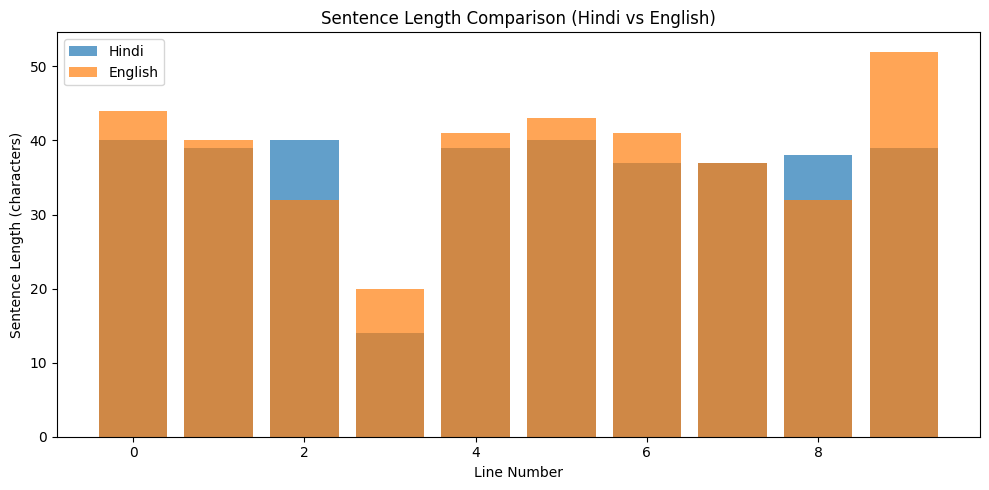

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV
df = pd.read_csv('translated_subtitles.csv')

# Step 2: Add a column with sentence length (number of characters)
df['Hindi Length'] = df['Hindi'].str.len()
df['English Length'] = df['English'].str.len()

# Step 3: Plot bar chart comparing lengths
plt.figure(figsize=(10, 5))
plt.bar(range(len(df)), df['Hindi Length'], label='Hindi', alpha=0.7)
plt.bar(range(len(df)), df['English Length'], label='English', alpha=0.7)
plt.xlabel('Line Number')
plt.ylabel('Sentence Length (characters)')
plt.title('Sentence Length Comparison (Hindi vs English)')
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
from collections import Counter
import re

# Helper function to clean text
def clean_text(text):
    return re.sub(r'\W+', ' ', text.lower())

# Clean and tokenize the text
hindi_words = " ".join(df['Hindi'].apply(clean_text)).split()
english_words = " ".join(df['English'].apply(clean_text)).split()

# Get the most common words
hindi_word_count = Counter(hindi_words).most_common(10)
english_word_count = Counter(english_words).most_common(10)

# Print the most common words
print("Most common Hindi words:", hindi_word_count)
print("Most common English words:", english_word_count)


Most common Hindi words: [('क', 16), ('ह', 10), ('स', 10), ('य', 8), ('त', 8), ('न', 8), ('म', 7), ('प', 6), ('र', 5), ('व', 4)]
Most common English words: [('in', 6), ('india', 4), ('pakistan', 4), ('is', 4), ('war', 3), ('can', 3), ('the', 3), ('a', 2), ('if', 2), ('who', 2)]


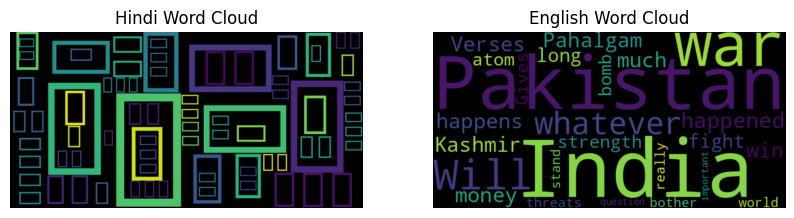

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for Hindi
hindi_text = " ".join(df['Hindi'])
hindi_wordcloud = WordCloud(width=800, height=400).generate(hindi_text)

# Create a word cloud for English
english_text = " ".join(df['English'])
english_wordcloud = WordCloud(width=800, height=400).generate(english_text)

# Plot both word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(hindi_wordcloud, interpolation='bilinear')
plt.title("Hindi Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(english_wordcloud, interpolation='bilinear')
plt.title("English Word Cloud")
plt.axis('off')

plt.show()


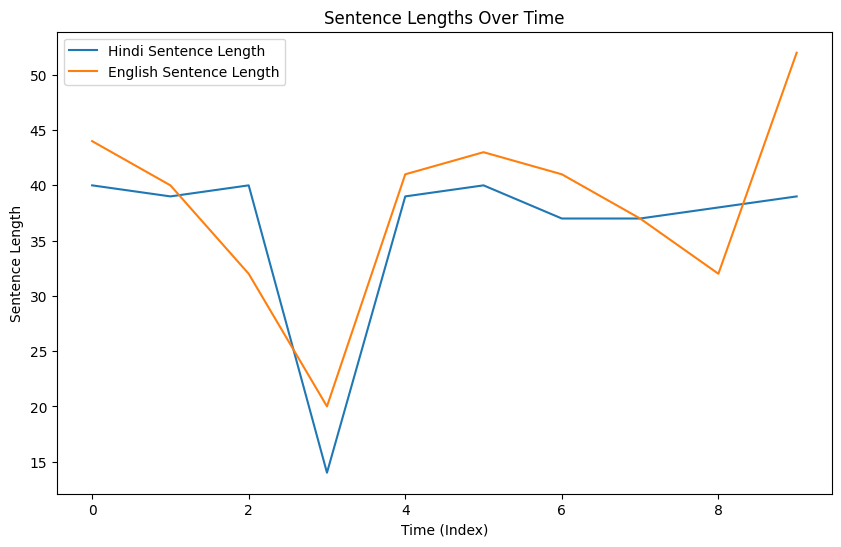

In [7]:
import matplotlib.pyplot as plt

# Calculate the sentence lengths for both Hindi and English
df['Hindi_Length'] = df['Hindi'].apply(len)
df['English_Length'] = df['English'].apply(len)

# Plot the sentence lengths over time
plt.figure(figsize=(10, 6))

plt.plot(df.index, df['Hindi_Length'], label='Hindi Sentence Length')
plt.plot(df.index, df['English_Length'], label='English Sentence Length')

plt.xlabel('Time (Index)')
plt.ylabel('Sentence Length')
plt.title('Sentence Lengths Over Time')
plt.legend()

plt.show()


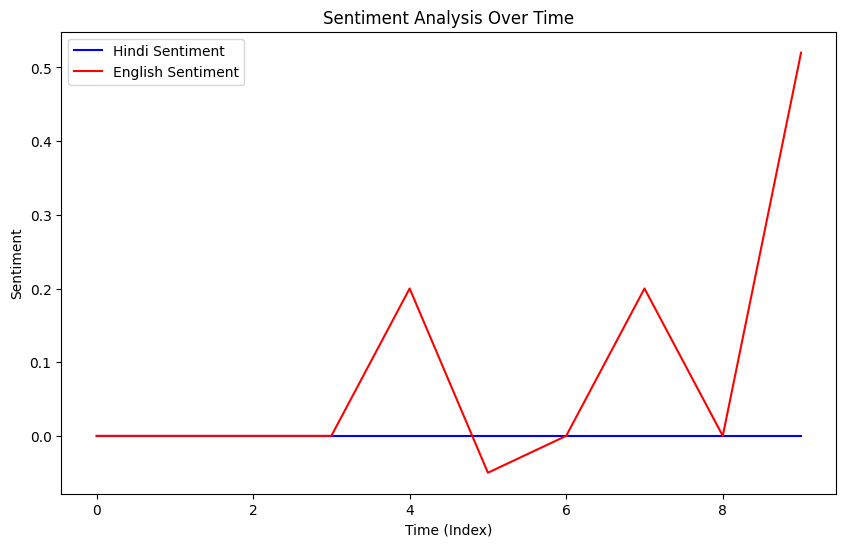

In [8]:
from textblob import TextBlob

# Helper function to get sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to both Hindi and English
df['Hindi_Sentiment'] = df['Hindi'].apply(get_sentiment)
df['English_Sentiment'] = df['English'].apply(get_sentiment)

# Plot the sentiment analysis over time
plt.figure(figsize=(10, 6))

plt.plot(df.index, df['Hindi_Sentiment'], label='Hindi Sentiment', color='blue')
plt.plot(df.index, df['English_Sentiment'], label='English Sentiment', color='red')

plt.xlabel('Time (Index)')
plt.ylabel('Sentiment')
plt.title('Sentiment Analysis Over Time')
plt.legend()

plt.show()


In [10]:
print(df.columns)


Index(['Hindi', 'English', 'Hindi Length', 'English Length', 'Hindi_Length',
       'English_Length', 'Hindi_Sentiment', 'English_Sentiment'],
      dtype='object')


In [11]:
# Step 1: Vectorize the 'English' column for NMF
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['English'])  # Use 'English' column instead of 'text'

# Step 2: Apply NMF and display topics as usual
nmf = NMF(n_components=5, random_state=1).fit(X)
feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(nmf, feature_names, 10)



Topic 1:
india war pakistan

Topic 2:
war pakistan india

Topic 3:
pakistan war india

Topic 4:
pakistan war india

Topic 5:
war india pakistan


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

# Step 1: Vectorize the 'Hindi' column for NMF
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=None)  # Set stop_words to None
X = vectorizer.fit_transform(df['Hindi'])  # Use 'Hindi' column for the text data

# Step 2: Apply NMF and display topics as usual
nmf = NMF(n_components=5, random_state=1).fit(X)
feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(nmf, feature_names, 10)



Topic 1:
कर सकत रत पर

Topic 2:
पर सकत रत कर

Topic 3:
सकत रत पर कर

Topic 4:
रत सकत पर कर

Topic 5:
पर सकत रत कर


In [15]:
import re

def clean_hindi(text):
    # Remove special characters and digits
    text = re.sub(r'[^\u0900-\u097F\s]', '', text)  # Keep only Hindi chars
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text

df['Hindi_cleaned'] = df['Hindi'].apply(clean_hindi)


In [17]:
nmf = NMF(n_components=5, random_state=1).fit(X)
feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(nmf, feature_names, 10)



Topic 1:
कर सकत रत पर

Topic 2:
पर सकत रत कर

Topic 3:
सकत रत पर कर

Topic 4:
रत सकत पर कर

Topic 5:
पर सकत रत कर


In [20]:
# Define a simple list of Hindi stopwords
hindi_stopwords = [
    'के', 'का', 'की', 'से', 'है', 'और', 'को', 'पर', 'यह', 'था', 'हैं', 'तो', 'में',
    'कि', 'जो', 'भी', 'कर', 'करना', 'किया', 'हो', 'रहा', 'रहे', 'एक', 'लेकिन', 'क्या',
    'जैसे', 'जब', 'तक', 'लिए', 'अब', 'या', 'नहीं', 'सकता', 'सकते', 'गया', 'दी', 'था',
    'थी', 'थे', 'होता', 'होती', 'होते', 'अपने', 'आप', 'हम', 'आपका', 'मेरे', 'उस', 'उन'
]


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

# Vectorization
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=hindi_stopwords)
X = vectorizer.fit_transform(df['Hindi'])  # or df['Hindi_cleaned'] if cleaned

# Apply NMF
nmf = NMF(n_components=5, random_state=1)
nmf.fit(X)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(nmf, feature_names, 10)



Topic 1:
रत सकत

Topic 2:
सकत रत

Topic 3:
सकत रत

Topic 4:
रत सकत

Topic 5:
रत सकत


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['अपन', 'आपक', 'करन', 'गय', 'नह', 'रह', 'सकत'] not in stop_words.
  warnings.warn(
